In [1]:
!pip install basemap --user
!pip install basemap-data
!pip install folium

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import csv

### Reading the Input

In [3]:
### Reading the Train event data
df_events = pd.read_csv("train_event_data.csv", dtype={'device_id': np.str, 'latitude': np.float, 'longitude':np.float,'event_id': np.str})

In [4]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266933 entries, 0 to 1266932
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   device_id      1266933 non-null  object 
 1   gender         1266933 non-null  object 
 2   age            1266933 non-null  int64  
 3   group_train    1266933 non-null  object 
 4   event_id       1215598 non-null  object 
 5   datetimestamp  1215598 non-null  object 
 6   latitude       1215598 non-null  float64
 7   longitude      1215598 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 77.3+ MB


In [5]:
### Reading the APP Event Data 
df_app_event = pd.read_csv('app_events.csv',dtype={'event_id': np.str, 'app_id': np.str, 'is_active':np.int64,'is_installed':np.int64})


In [6]:
df_app_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32473067 entries, 0 to 32473066
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   event_id      object
 1   app_id        object
 2   is_installed  int64 
 3   is_active     int64 
dtypes: int64(2), object(2)
memory usage: 991.0+ MB


In [7]:
df_mobile_brand = pd.read_csv('train_mobile_brand.csv',dtype={'device_id': np.str})

In [8]:
df_mobile_brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74840 entries, 0 to 74839
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     74840 non-null  object
 1   gender        74840 non-null  object
 2   age           74840 non-null  int64 
 3   group_train   74840 non-null  object
 4   phone_brand   74840 non-null  object
 5   device_model  74840 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.4+ MB


In [9]:
df_app_metadata = pd.read_csv('app_events_meta_data.csv',encoding='utf-8',quoting=csv.QUOTE_NONE)
df_app_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459944 entries, 0 to 459943
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   app_id    459944 non-null  object
 1   label_id  459944 non-null  object
 2   category  459944 non-null  object
dtypes: object(3)
memory usage: 10.5+ MB


### Understanding the Data

In [10]:
print("App event data size:",df_app_event.shape)
print("Metadata size:",df_app_metadata.shape)
print("Train event data size:",df_events.shape)
print("Mobile Brand data size:",df_mobile_brand.shape)

App event data size: (32473067, 4)
Metadata size: (459944, 3)
Train event data size: (1266933, 8)
Mobile Brand data size: (74840, 6)


In [11]:
print("Unqiue app events in data:", df_app_event.nunique())

Unqiue app events in data: event_id        1488096
app_id            19237
is_installed          1
is_active             2
dtype: int64


In [12]:
print("Unqiue events in data:", df_events.nunique())

Unqiue events in data: device_id          74645
gender                 2
age                   85
group_train            6
event_id         1215598
datetimestamp     497663
latitude            2707
longitude           2914
dtype: int64


In [13]:
print("Unqiue app metadata in data:", df_app_metadata.nunique())

Unqiue app metadata in data: app_id      165044
label_id       554
category       472
dtype: int64


In [14]:
print("Unqiue mobile brands in data:", df_mobile_brand.nunique())

Unqiue mobile brands in data: device_id       74645
gender              2
age                85
group_train         6
phone_brand        97
device_model     1438
dtype: int64


In [15]:
df_app_metadata.head()

,app_id,label_id,category
0,app_id,label_id,category
1,7324884708820027918,251,Finance
2,-4494216993218550286,251,Finance
3,6058196446775239644,406,unknown
4,6058196446775239644,407,DS_P2P net loan


### Cleaning 

In [16]:
df_app_metadata = df_app_metadata.loc[1:,:] ### One row is header only removing from the dataframe

In [17]:
### Missing data Analysis 
df_events.info() ### Missing value present 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266933 entries, 0 to 1266932
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   device_id      1266933 non-null  object 
 1   gender         1266933 non-null  object 
 2   age            1266933 non-null  int64  
 3   group_train    1266933 non-null  object 
 4   event_id       1215598 non-null  object 
 5   datetimestamp  1215598 non-null  object 
 6   latitude       1215598 non-null  float64
 7   longitude      1215598 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 77.3+ MB


In [18]:
## Convert in datetime 

df_events['datetimestamp'] = pd.to_datetime(df_events['datetimestamp'])

### With Event data 
df_train_event_with = df_events.loc[~df_events.isna()['event_id']]

### without Event data
df_train_event_without = df_events.loc[df_events.isna()['event_id']]


In [19]:
df_train_event_with.shape

(1215598, 8)

In [20]:
df_app_metadata.info()### No missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459943 entries, 1 to 459943
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   app_id    459943 non-null  object
 1   label_id  459943 non-null  object
 2   category  459943 non-null  object
dtypes: object(3)
memory usage: 10.5+ MB


In [21]:
df_mobile_brand.info() ## No Missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74840 entries, 0 to 74839
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     74840 non-null  object
 1   gender        74840 non-null  object
 2   age           74840 non-null  int64 
 3   group_train   74840 non-null  object
 4   phone_brand   74840 non-null  object
 5   device_model  74840 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.4+ MB


In [22]:
df_events.shape

(1266933, 8)

In [23]:
### Merging the data 

df_events = df_events.merge(df_mobile_brand[['phone_brand', 'device_id']], how = 'left',
                left_on = 'device_id', right_on = 'device_id')

In [24]:
df_events.shape

(1271918, 9)

In [25]:
print(len(set(df_events.event_id)))
print(len(set(df_app_event.event_id)))

1215599
1488096


In [26]:
df_app_event.head()

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


### EDA

###  1. df_app_event
###  2. df_mobile_brand
###  3. df_app_metadata
###  4. df_events

In [27]:
df_events.head()

,device_id,gender,age,group_train,event_id,datetimestamp,latitude,longitude,phone_brand
0,-7548291590301750000,M,33,M32+,2369465,2016-05-03 15:55:35,33.98,116.79,Huawei
1,-7548291590301750000,M,33,M32+,1080869,2016-05-03 06:07:16,33.98,116.79,Huawei
2,-7548291590301750000,M,33,M32+,1079338,2016-05-04 03:28:02,33.98,116.79,Huawei
3,-7548291590301750000,M,33,M32+,1078881,2016-05-04 02:53:08,33.98,116.79,Huawei
4,-7548291590301750000,M,33,M32+,1068711,2016-05-03 15:59:35,33.98,116.79,Huawei


In [28]:
df_mobile_brand.head()

,device_id,gender,age,group_train,phone_brand,device_model
0,-7548291590301750000,M,33,M32+,Huawei,è£è€€3C
1,6943568600617760000,M,37,M32+,Xiaomi,xnote
2,5441349705980020000,M,40,M32+,OPPO,R7s
3,-5393876656119450000,M,33,M32+,Xiaomi,MI 4
4,4543988487649880000,M,53,M32+,samsung,Galaxy S4


In [29]:
df_train_event_with.head()

,device_id,gender,age,group_train,event_id,datetimestamp,latitude,longitude
0,-7548291590301750000,M,33,M32+,2369465,2016-05-03 15:55:35,33.98,116.79
1,-7548291590301750000,M,33,M32+,1080869,2016-05-03 06:07:16,33.98,116.79
2,-7548291590301750000,M,33,M32+,1079338,2016-05-04 03:28:02,33.98,116.79
3,-7548291590301750000,M,33,M32+,1078881,2016-05-04 02:53:08,33.98,116.79
4,-7548291590301750000,M,33,M32+,1068711,2016-05-03 15:59:35,33.98,116.79


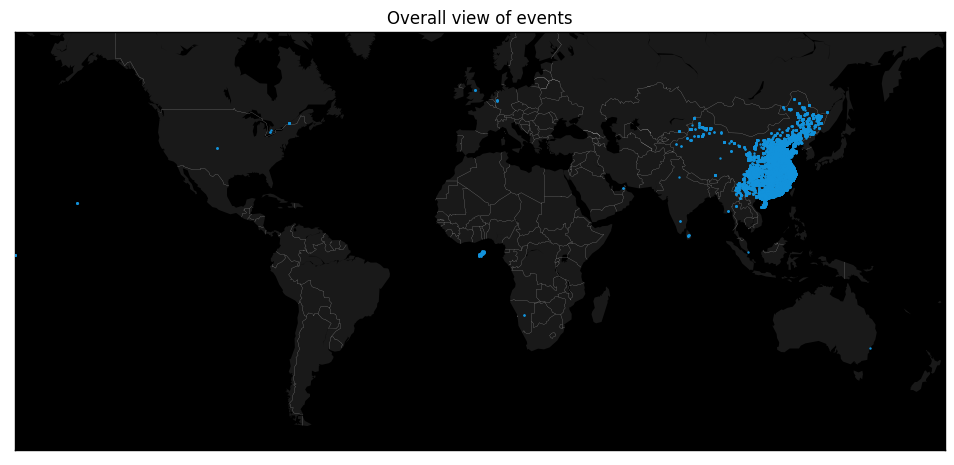

In [30]:
df_events_sample = df_train_event_with.sample(n=100000)
plt.figure(1, figsize=(12,6))

#Meractor of World
m1 = Basemap(projection='merc',
             llcrnrlat = -60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#191919', lake_color='#000000') #dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000') # balck background
m1.drawcountries(linewidth=0.1, color='w') #thin white line for country borders

#Plot the data
mxy = m1(df_events_sample["longitude"].tolist(), df_events_sample["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="#1292db", lw=0, alpha=1, zorder=5)

plt.title("Overall view of events")
plt.show()

In [31]:
df_male = df_events_sample[df_events_sample["gender"]=="M"]

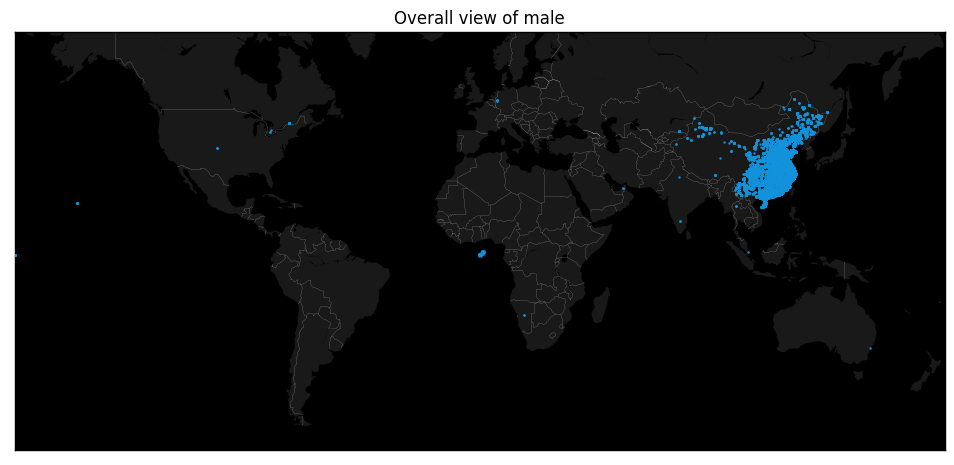

In [32]:
plt.figure(1, figsize=(12,6))

m1 = Basemap(projection='merc',
             llcrnrlat = -60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#191919', lake_color='#000000') #dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000') # balck background
m1.drawcountries(linewidth=0.1, color='w') #thin white line for country borders

#Plot the data
mxy = m1(df_male["longitude"].tolist(), df_male["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="#1292db", lw=0, alpha=1, zorder=5)

plt.title("Overall view of male")
plt.show()

In [33]:
df_female = df_events_sample[df_events_sample["gender"]=="F"]

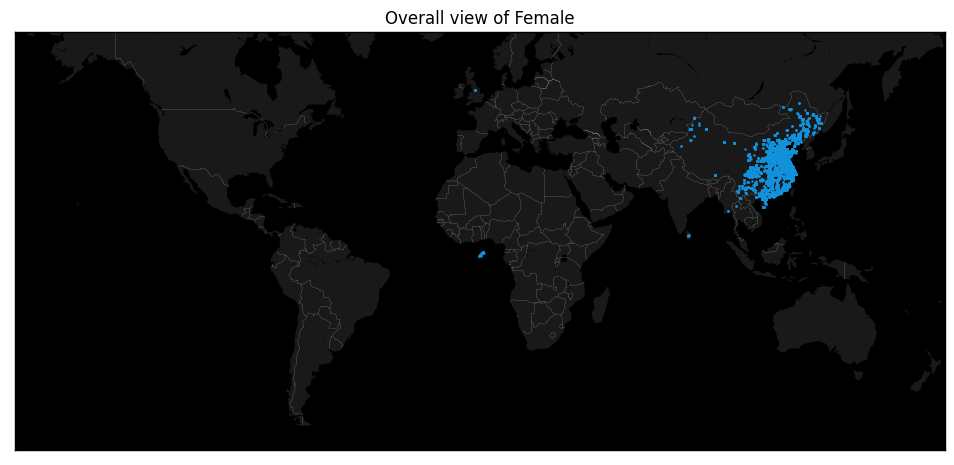

In [34]:
plt.figure(1, figsize=(12,6))

m1 = Basemap(projection='merc',
             llcrnrlat = -60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#191919', lake_color='#000000') #dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000') # balck background
m1.drawcountries(linewidth=0.1, color='w') #thin white line for country borders

#Plot the data
mxy = m1(df_female["longitude"].tolist(), df_female["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="#1292db", lw=0, alpha=1, zorder=5)

plt.title("Overall view of Female")
plt.show()

In [35]:
### Event with Gender and Age

df_train_event_with['group_age']=df_train_event_with['group_train'].apply(lambda x : x[1:])

In [36]:
df_train_event_with.head()

,device_id,gender,age,group_train,event_id,datetimestamp,latitude,longitude,group_age
0,-7548291590301750000,M,33,M32+,2369465,2016-05-03 15:55:35,33.98,116.79,32+
1,-7548291590301750000,M,33,M32+,1080869,2016-05-03 06:07:16,33.98,116.79,32+
2,-7548291590301750000,M,33,M32+,1079338,2016-05-04 03:28:02,33.98,116.79,32+
3,-7548291590301750000,M,33,M32+,1078881,2016-05-04 02:53:08,33.98,116.79,32+
4,-7548291590301750000,M,33,M32+,1068711,2016-05-03 15:59:35,33.98,116.79,32+


<AxesSubplot: xlabel='gender'>

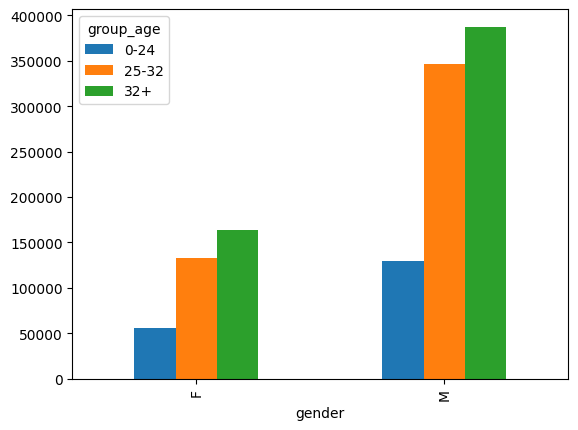

In [37]:
CrosstabResult=pd.crosstab(index=df_train_event_with['gender'],columns=df_train_event_with['group_age'])
CrosstabResult.plot.bar()

### Plot percentage of device_ids with and without event data 



### Graph representing the distribution of events on different days of a week 



<AxesSubplot: xlabel='datetimestamp'>

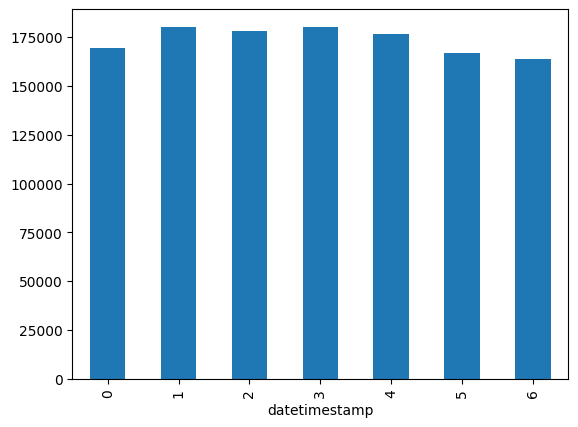

In [38]:
df_train_event_with.groupby(df_train_event_with.datetimestamp.dt.dayofweek)['event_id'].count().plot(kind="bar")


### Graph representing the distribution of events per hour (for one-week data)

In [39]:
df_train_event_with['week'] = df_train_event_with.datetimestamp.dt.week

In [40]:
df_event_one_week = df_train_event_with[df_train_event_with['week'] == 17]

<AxesSubplot: xlabel='datetimestamp'>

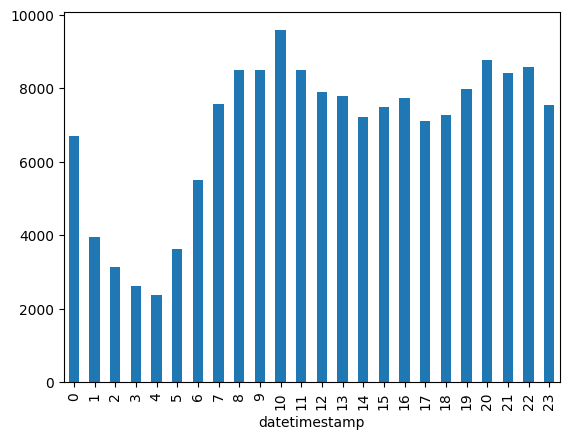

In [41]:
df_event_one_week.groupby(df_event_one_week.datetimestamp.dt.hour)['event_id'].count().plot(kind="bar")


### The difference in the distribution of events per hour for males and females (Show the difference using an appropriate chart for one week’s data)

<AxesSubplot: xlabel='datetimestamp'>

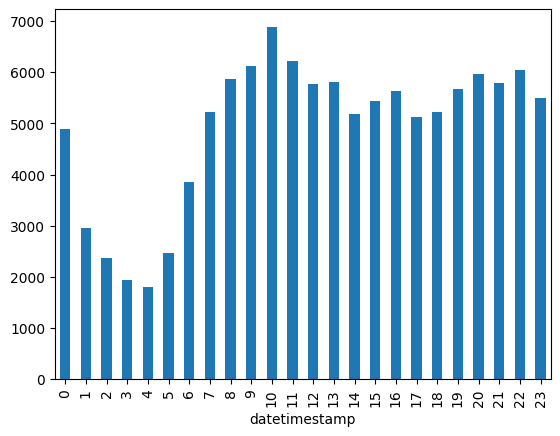

In [42]:
df_event_one_week_male = df_event_one_week[df_event_one_week['gender'] == 'M']
df_event_one_week_male.groupby(df_event_one_week_male.datetimestamp.dt.hour)['event_id'].count().plot(kind="bar")


<AxesSubplot: xlabel='datetimestamp'>

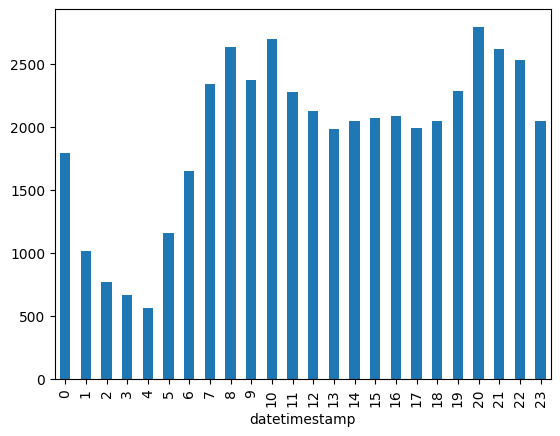

In [43]:
df_event_one_week_female = df_event_one_week[df_event_one_week['gender'] == 'F']
df_event_one_week_female.groupby(df_event_one_week_female.datetimestamp.dt.hour)['event_id'].count().plot(kind="bar")


### Is there any difference in the distribution of events for different age groups over different days of week? (Consider the age groups as 0–24, 25–32, 33–45, 46+]

Text(0.5, 0, '0-24 vs different days of week')

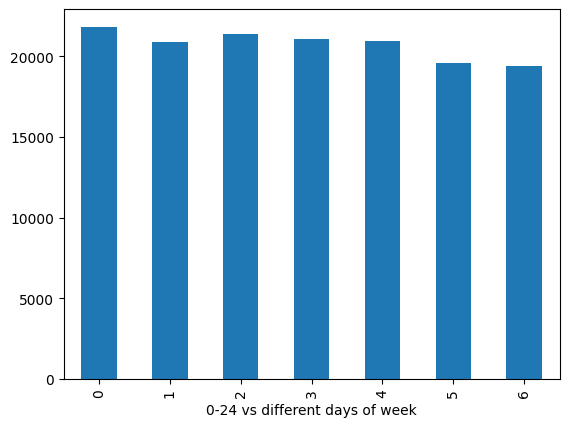

In [49]:
df_train_event_withage024 = df_train_event_with[(df_train_event_with['age']> 0) & (df_train_event_with['age']<= 24)]
df_train_event_withage024.groupby(df_train_event_withage024.datetimestamp.dt.dayofweek)['event_id'].count().plot(kind="bar")
plt.xlabel('0-24 vs different days of week')

Text(0.5, 0, '25-32 vs different days of week')

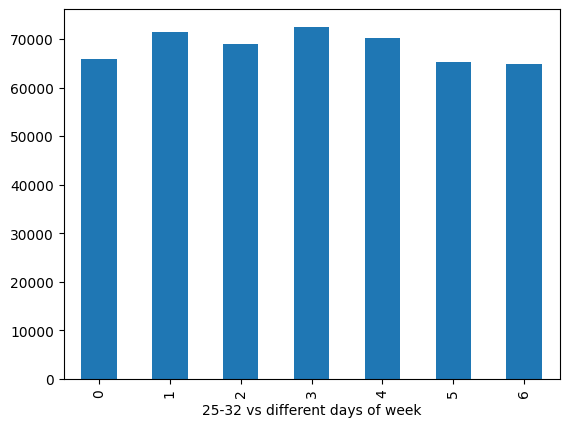

In [53]:
df_train_event_withage024 = df_train_event_with[(df_train_event_with['age']> 24) & (df_train_event_with['age']<= 32)]
df_train_event_withage024.groupby(df_train_event_withage024.datetimestamp.dt.dayofweek)['event_id'].count().plot(kind="bar")
plt.xlabel('25-32 vs different days of week')

Text(0.5, 0, '33-45 vs different days of week')

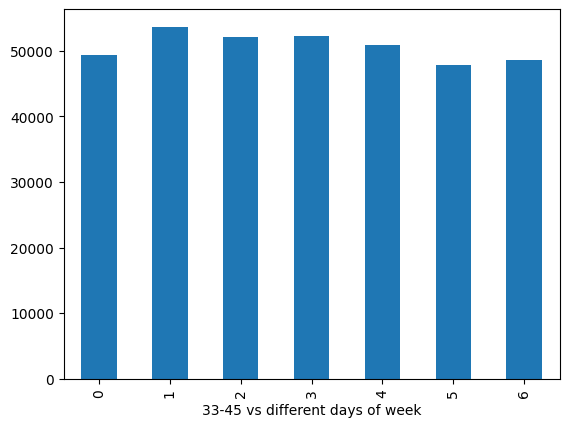

In [54]:
df_train_event_withage024 = df_train_event_with[(df_train_event_with['age']> 33) & (df_train_event_with['age']<= 45)]
df_train_event_withage024.groupby(df_train_event_withage024.datetimestamp.dt.dayofweek)['event_id'].count().plot(kind="bar")
plt.xlabel('33-45 vs different days of week')

Text(0.5, 0, '46+ vs different days of week')

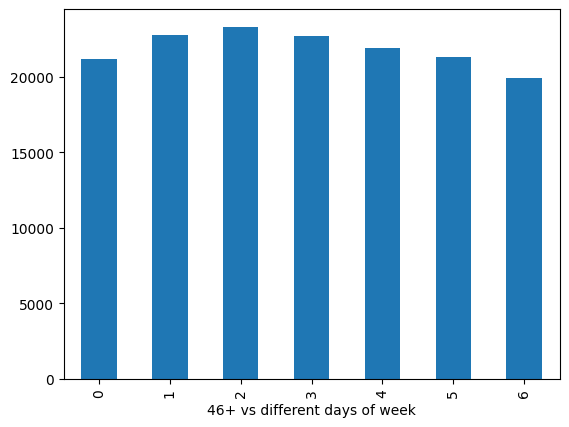

In [55]:
df_train_event_withage024 = df_train_event_with[(df_train_event_with['age']>= 46) ]
df_train_event_withage024.groupby(df_train_event_withage024.datetimestamp.dt.dayofweek)['event_id'].count().plot(kind="bar")
plt.xlabel('46+ vs different days of week')

### Phone Brand and Application Preferences:



### 1. Stacked bar chart for the top 10 mobile brands across male and female consumers


In [70]:
top10 = df_mobile_brand.groupby(['phone_brand']).count()['device_id'].sort_values(ascending=False).head(10).index.values

In [74]:
df_mobile_brand.head()

,device_id,gender,age,group_train,phone_brand,device_model
0,-7548291590301750000,M,33,M32+,Huawei,è£è€€3C
1,6943568600617760000,M,37,M32+,Xiaomi,xnote
2,5441349705980020000,M,40,M32+,OPPO,R7s
3,-5393876656119450000,M,33,M32+,Xiaomi,MI 4
4,4543988487649880000,M,53,M32+,samsung,Galaxy S4


In [85]:
df_top_10 = df_mobile_brand[df_mobile_brand['phone_brand'].isin(top_10)][['gender','phone_brand']]
grouped = df_top_10.groupby(['phone_brand', 'gender']).size().unstack()


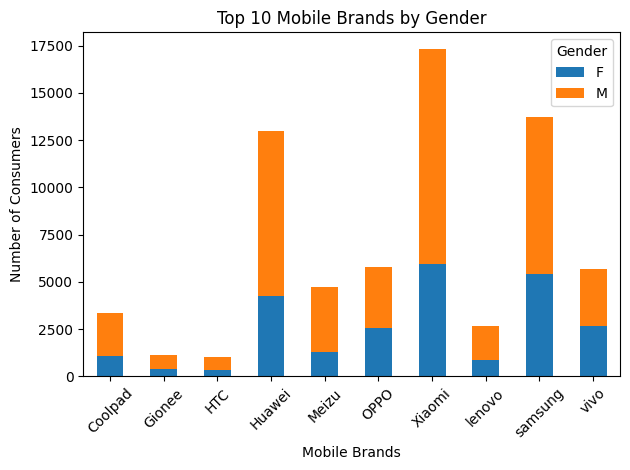

In [87]:
grouped.plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Mobile Brands')
plt.ylabel('Number of Consumers')
plt.title('Top 10 Mobile Brands by Gender')
plt.xticks(rotation=45)

# Adding a legend
plt.legend(title='Gender')

# Displaying the chart
plt.tight_layout()
plt.show()

### 2. Chart representing 10 frequent applications and the corresponding percentage of male and female consumers



In [90]:
df_mobile_brand.head()

,device_id,gender,age,group_train,phone_brand,device_model
0,-7548291590301750000,M,33,M32+,Huawei,è£è€€3C
1,6943568600617760000,M,37,M32+,Xiaomi,xnote
2,5441349705980020000,M,40,M32+,OPPO,R7s
3,-5393876656119450000,M,33,M32+,Xiaomi,MI 4
4,4543988487649880000,M,53,M32+,samsung,Galaxy S4


In [93]:
merged_df = df_train_event_with.merge(df_app_event, on='event_id')


In [97]:
merged_df = merged_df.merge(df_mobile_brand[['device_id','phone_brand']], on='device_id')


In [99]:
df_app_metadata.head()

,app_id,label_id,category
1,7324884708820027918,251,Finance
2,-4494216993218550286,251,Finance
3,6058196446775239644,406,unknown
4,6058196446775239644,407,DS_P2P net loan
5,8694625920731541625,406,unknown


In [98]:
merged_df.head()

,device_id,gender,age,group_train,event_id,datetimestamp,latitude,longitude,group_age,week,app_id,is_installed,is_active,phone_brand
0,-7548291590301750000,M,33,M32+,1141870,2016-05-01 10:08:16,33.98,116.79,32+,17,3433289601737013244,1,1,Huawei
1,-7548291590301750000,M,33,M32+,1141870,2016-05-01 10:08:16,33.98,116.79,32+,17,-5472633337921616096,1,1,Huawei
2,-7548291590301750000,M,33,M32+,1141870,2016-05-01 10:08:16,33.98,116.79,32+,17,9112463114311278255,1,0,Huawei
3,-7548291590301750000,M,33,M32+,1141870,2016-05-01 10:08:16,33.98,116.79,32+,17,8693964245073640147,1,1,Huawei
4,-7548291590301750000,M,33,M32+,1141870,2016-05-01 10:08:16,33.98,116.79,32+,17,5099453940784075687,1,1,Huawei


In [ ]:
df_train_event_with.head()

### Top 10 mobile phone brands by age groups (Consider the age groups as 0–24, 25–32, 33–45, 46+.)



In [100]:
# Define the age groups
bins = [0, 24, 32, 45, 150]
labels = ['0-24', '25-32', '33-45', '46+']

# Categorize the ages into groups
df_mobile_brand['age_group'] = pd.cut(df_mobile_brand['age'], bins=bins, labels=labels, right=False)

# Grouping the dataframe by age group and phone brand and calculating the count
grouped = df_mobile_brand.groupby(['age_group', 'phone_brand']).size()

# Finding the top 10 mobile phone brands in each age group
top10_by_age_group = grouped.groupby('age_group').nlargest(10)

# Display the top 10 mobile phone brands by age group
print(top10_by_age_group)


age_group  age_group  phone_brand
0-24       0-24       Xiaomi         3373
                      Huawei         1939
                      samsung        1834
                      vivo           1647
                      OPPO           1567
                      Meizu          1366
                      Coolpad         660
                      lenovo          501
                      Gionee          270
                      HTC             198
25-32      25-32      Xiaomi         7765
                      samsung        5605
                      Huawei         5129
                      vivo           2495
                      OPPO           2487
                      Meizu          2244
                      Coolpad        1255
                      lenovo         1029
                      HTC             447
                      Gionee          414
33-45      33-45      Xiaomi         4502
                      samsung        4483
                      Huawei         4284
